<a href="https://colab.research.google.com/github/annaluizacaraciolo/Aprendizagem_de_Maquina/blob/main/SVM_SwarmBehavior_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset

In [1]:
import pandas as pd
# Import all 3 separate files
aligned = pd.read_csv("Aligned.csv")
flocking = pd.read_csv("Flocking.csv")
grouped = pd.read_csv("Grouped.csv")

<ipython-input-1-23313a9d868c>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  flocking = pd.read_csv("Flocking.csv")


In [2]:
# Concatenate the dataframes into a single dataframe
df = pd.concat([aligned, flocking, grouped])

# Reset the index of the concatenated dataframe
df = df.reset_index(drop=True)

In [3]:
# Drop last column
df = df.iloc[:,:-1]

# Drop first column
df.drop(['x1'], axis=1, inplace=True)

df.dtypes

y1        float64
xVel1     float64
yVel1     float64
xA1       float64
yA1       float64
           ...   
xC200     float64
yC200     float64
nAC200      int64
nS200       int64
Class     float64
Length: 2400, dtype: object

In [4]:
# Substitute all NaN with the mean of the column
df.fillna(df.mean(), inplace=True)

In [5]:
# Change all columns to datatype float
df = df.astype('float64')

# Change Class column to int
df['Class'] = df['Class'].astype('int64')

df.dtypes

y1        float64
xVel1     float64
yVel1     float64
xA1       float64
yA1       float64
           ...   
xC200     float64
yC200     float64
nAC200    float64
nS200     float64
Class       int64
Length: 2400, dtype: object

In [6]:
# Identificar e tratar valores discrepantes (outliers)
outliers = []
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
data = df.drop(outliers)

Swarm Behaviour. (2020). UCI Machine Learning Repository.

## Training model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = aligned.Class
X = aligned.drop('Class', axis=1)
train_ratio = 0.7
test_ratio = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=1)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

In [9]:
from sklearn import svm

In [10]:
svm_classifier = svm.SVC()

In [11]:
svm_classifier.fit(X_train, y_train)

SVC()

In [13]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
kernels_range = ['linear', 'rbf', 'sigmoid', 'precomputed']
c_range = [0.1, 1, 10]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation

for k in range(4):
    for j in c_range:
      svc = svm.SVC(C=j, random_state=10, kernel=kernels_range[k])
      scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
      k_scores_cross.append(scores.mean())
      svc.fit(X_train, y_train)
      k_scores_train.append(svc.score(X_train, y_train))
      k_scores_valid.append(svc.score(X_valid, y_valid))

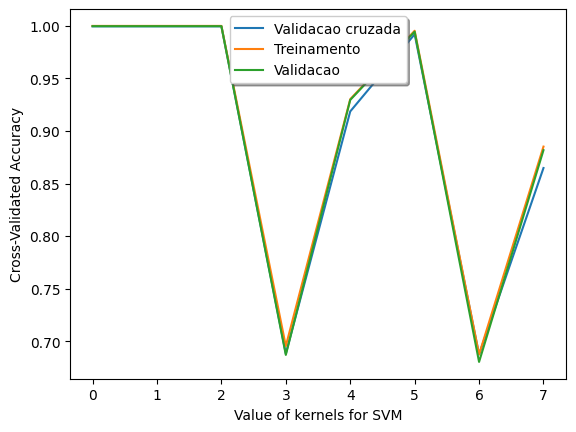

In [15]:
# plot to see clearly
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of kernels for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [16]:
print("Acuracia de treinamento clf: %0.3f" %  svm_classifier.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  svm_classifier.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  svm_classifier.score(X_test, y_test))

Acuracia de treinamento clf: 0.940
Acuracia de validacao clf: 0.939
Acuracia de teste clf: 0.936


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

In [18]:
cm_svm = confusion_matrix(y_test, svm_classifier.predict(X_test))

<Axes: >

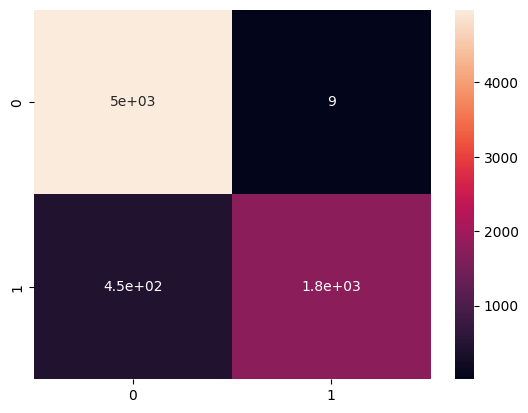

In [19]:
import seaborn as sns
sns.heatmap(cm_svm, annot=True)